In [1]:
import pandas as pd
import seaborn as sns

### Reading a file
- Each file here is a shard of hydi_track_10_58_0.trk (split into 10 shards). 72.7-165.3MB in size.
- Block size is 32MB
- 5 repetitions

#### 1 File

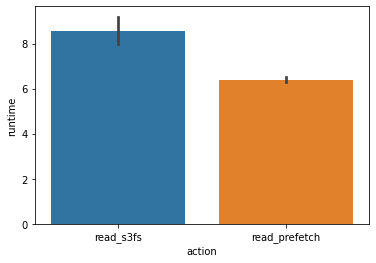

In [14]:
df = pd.read_csv("../results/us-west-2-R5.4xlarge/segmentation_shards_waypoint_1f_5r_33554432b.out")
df_read = df[df["action"].str.contains("read")]
ax = sns.barplot(x="action", y="runtime", data=df_read)


#### 9 Files

<ipython-input-15-923a2e07790d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_read["rep"] = df_read.index.values
<ipython-input-15-923a2e07790d>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_read["rep"] = df_read["rep"].apply( lambda v:
/home/valeriehayot/Documents/code/ariel_internship/rollingprefetch/.venv/lib64/python3.9/site-packages/pandas/core/indexing.py:1787: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer

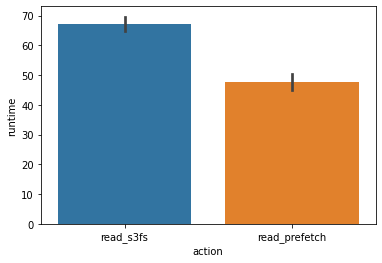

In [15]:
df = pd.read_csv("../results/us-west-2-R5.4xlarge/segmentation_shards_waypoint_9f_5r_33554432b.out")
df_read = df[df["action"].str.contains("read")]
df_read["rep"] = df_read.index.values

df_read["rep"] = df_read["rep"].apply( lambda v:
    0 if 0 <= v <= 10 
    else 1 if 12 <= v <= 22
    else 2 if 24 <= v <= 34
    else 3 if 36 <= v <= 46
    else 4
) 
df_read.loc[df["action"].str.contains("s3fs"), ["rep","runtime"]] = df_read.loc[df["action"].str.contains("s3fs"), ["rep","runtime"]].groupby("rep").sum()
ax = sns.barplot(x="action", y="runtime", data=df_read)

## Full segmentation benchmarks

- Each file here is a shard of hydi_track_10_58_0.trk (split into 10 shards). 72.7-165.3MB in size.
- Block size is 32MB
- 5 repetitions

#### 1 file

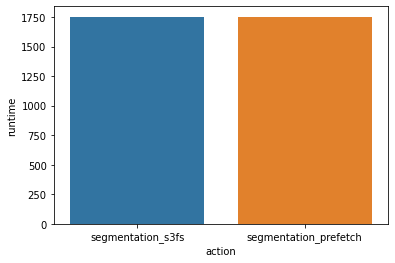

In [17]:
df = pd.read_csv("../results/us-west-2-R5.4xlarge/segmentation_shards_waypoint_1f_5r_33554432b.out")
df_seg = df[df["action"].str.contains("seg")]
ax = sns.barplot(x="action", y="runtime", data=df_seg)

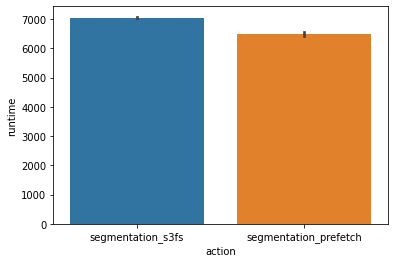

In [18]:
df = pd.read_csv("../results/us-west-2-R5.4xlarge/segmentation_shards_waypoint_9f_5r_33554432b.out")
df_seg = df[df["action"].str.contains("seg")]
ax = sns.barplot(x="action", y="runtime", data=df_seg)